In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
import numpy as np
import requests
import time
import json
from pandas import json_normalize
from pprint import pprint

In [3]:
file_path = (r"C:\Users\jasmi\Downloads\Austin_Animal_Center_Intakes.csv")
df = pd.read_csv(r"C:\Users\jasmi\Downloads\Austin_Animal_Center_Intakes.csv")

In [4]:
# Set the API base URL 
json_url = f"https://data.austintexas.gov/resource/9t4d-g238.json"

# Create URL for GET requests
animal_data = requests.get(json_url).json()

# Convert the API to a DataFrame and display data
animal_df = pd.DataFrame.from_dict(json_normalize(animal_data))
animal_df.tail(5)

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
995,A722325,Bella,2016-05-16T15:56:00.000,2016-05-16T15:56:00.000,2015-08-14T00:00:00.000,Return to Owner,Dog,Spayed Female,9 months,Labrador Retriever Mix,Black,NaN
996,A664032,Parker,2013-10-01T17:18:00.000,2013-10-01T17:18:00.000,2013-07-27T00:00:00.000,Adoption,Dog,Spayed Female,2 months,German Shepherd Mix,Black/Tan,NaN
997,A785557,Spicy,2018-12-16T14:59:00.000,2018-12-16T14:59:00.000,2016-12-05T00:00:00.000,Return to Owner,Dog,Intact Male,2 years,American Pit Bull Terrier Mix,Brown/White,NaN
998,A800965,Marley,2019-08-17T16:40:00.000,2019-08-17T16:40:00.000,2016-07-29T00:00:00.000,Adoption,Dog,Spayed Female,3 years,Blue Lacy/Beagle,Blue/White,NaN
999,A805280,*Vincent,2019-12-14T16:55:00.000,2019-12-14T16:55:00.000,2019-06-06T00:00:00.000,Adoption,Cat,Neutered Male,6 months,Domestic Shorthair,Orange Tabby/White,NaN


In [5]:
## JSON results are limited and will not provide 2022 information.
## Switching from JSON to CSV.

In [6]:
# Path to collect CSV data 
csv_url = "https://github.com/SariStormdance/Project_1/blob/main/Resources/Animal_Outcome.csv?raw=true"

# Convert CSV to DataFrame
initial_df = pd.read_csv(csv_url)
initial_df.tail(5)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
153437,A883539,*Pipsqueak,07/19/2023 05:18:00 PM,Jul 2023,02/24/2023,Adoption,NaN,Dog,Intact Female,4 months,Labrador Retriever Mix,Cream/White
153438,A884334,Noche,07/19/2023 05:14:00 PM,Jul 2023,04/01/2023,Adoption,NaN,Cat,Spayed Female,3 months,Domestic Shorthair,Black
153439,A885055,Sparky,07/19/2023 05:00:00 PM,Jul 2023,04/12/2023,Adoption,NaN,Cat,Neutered Male,3 months,Siamese,Flame Point
153440,A884031,Bowzer,07/19/2023 05:26:00 PM,Jul 2023,06/27/2019,Adoption,NaN,Dog,Neutered Male,4 years,Labrador Retriever Mix,Cream/Yellow
153441,A883741,*Fiddle,07/19/2023 06:57:00 PM,Jul 2023,06/22/2022,Transfer,Partner,Dog,Intact Male,1 year,Australian Cattle Dog Mix,Tan/White


In [7]:
# Creating a DataFrame copy to reduce to essential columns
reduced_columns_df= initial_df[["Animal ID", "MonthYear", "Outcome Type", "Animal Type", "Breed"]].copy()
reduced_columns_df.tail(5)

,Animal ID,MonthYear,Outcome Type,Animal Type,Breed
153437,A883539,Jul 2023,Adoption,Dog,Labrador Retriever Mix
153438,A884334,Jul 2023,Adoption,Cat,Domestic Shorthair
153439,A885055,Jul 2023,Adoption,Cat,Siamese
153440,A884031,Jul 2023,Adoption,Dog,Labrador Retriever Mix
153441,A883741,Jul 2023,Transfer,Dog,Australian Cattle Dog Mix


In [8]:
# Rename column and split a DataFrame column
reduced_columns_df.rename(columns = {"MonthYear":"Month Year"}, inplace = True)
reduced_columns_df[["Month","Year"]] = reduced_columns_df["Month Year"].str.split(" ",expand=True)
reduced_columns_df.tail(5)

,Animal ID,Month Year,Outcome Type,Animal Type,Breed,Month,Year
153437,A883539,Jul 2023,Adoption,Dog,Labrador Retriever Mix,Jul,2023
153438,A884334,Jul 2023,Adoption,Cat,Domestic Shorthair,Jul,2023
153439,A885055,Jul 2023,Adoption,Cat,Siamese,Jul,2023
153440,A884031,Jul 2023,Adoption,Dog,Labrador Retriever Mix,Jul,2023
153441,A883741,Jul 2023,Transfer,Dog,Australian Cattle Dog Mix,Jul,2023


In [9]:
# Cleaning and rearranging the data
updated_columns_df = reduced_columns_df[["Animal ID", "Month", "Year", "Outcome Type", "Animal Type", "Breed"]].copy()
updated_columns_df.tail(5)

,Animal ID,Month,Year,Outcome Type,Animal Type,Breed
153437,A883539,Jul,2023,Adoption,Dog,Labrador Retriever Mix
153438,A884334,Jul,2023,Adoption,Cat,Domestic Shorthair
153439,A885055,Jul,2023,Adoption,Cat,Siamese
153440,A884031,Jul,2023,Adoption,Dog,Labrador Retriever Mix
153441,A883741,Jul,2023,Transfer,Dog,Australian Cattle Dog Mix


In [10]:
# Data check: Displaying number of records per year
updated_columns_df["Year"].value_counts()

Year
2019    19775
2014    18709
2015    18506
2016    17670
2017    17657
2018    16741
2021    11966
2022    11880
2020     9777
2023     6256
2013     4505
Name: count, dtype: int64

In [11]:
# Narrowing dataset to 2022 timeframe
defined_year_df = updated_columns_df[updated_columns_df["Year"] == "2022"]
defined_year_df.tail(5)

,Animal ID,Month,Year,Outcome Type,Animal Type,Breed
153073,A857909,Jun,2022,Adoption,Dog,Pit Bull Mix
153108,A853013,Apr,2022,Adoption,Cat,Domestic Shorthair
153197,A862948,Aug,2022,Transfer,Cat,Domestic Shorthair Mix
153355,A850898,Feb,2022,Adoption,Dog,Siberian Husky Mix
153422,A869924,Dec,2022,Transfer,Cat,Domestic Shorthair


In [12]:
# Resetting index for tracking purposes
index_reset_df = defined_year_df.reset_index(drop=True)
index_reset_df.tail(5)

,Animal ID,Month,Year,Outcome Type,Animal Type,Breed
11875,A857909,Jun,2022,Adoption,Dog,Pit Bull Mix
11876,A853013,Apr,2022,Adoption,Cat,Domestic Shorthair
11877,A862948,Aug,2022,Transfer,Cat,Domestic Shorthair Mix
11878,A850898,Feb,2022,Adoption,Dog,Siberian Husky Mix
11879,A869924,Dec,2022,Transfer,Cat,Domestic Shorthair


In [13]:
#Display total animal counts
index_reset_df["Animal Type"].value_counts()

Animal Type
Dog          6412
Cat          4766
Other         592
Bird          109
Livestock       1
Name: count, dtype: int64

In [14]:
# Create separate dataframe for cat outcomes
Cat = ["Cat"] 
cat_outcomes_df = index_reset_df[index_reset_df["Animal Type"].isin(Cat)]
cat_outcomes_df.head(5)

,Animal ID,Month,Year,Outcome Type,Animal Type,Breed
0,A860161,Jul,2022,Adoption,Cat,Domestic Shorthair
2,A848454,Jan,2022,Adoption,Cat,Domestic Shorthair Mix
3,A822928,Jan,2022,Adoption,Cat,Domestic Shorthair
5,A852822,Mar,2022,Adoption,Cat,Domestic Shorthair
13,A856357,Jun,2022,Adoption,Cat,Domestic Shorthair


In [15]:
# Data check: display monthly cat totals
cat_outcomes_df["Month"].value_counts()

Month
Aug    587
Jun    581
Jul    536
May    503
Sep    430
Jan    375
Dec    368
Nov    335
Oct    316
Apr    296
Mar    228
Feb    211
Name: count, dtype: int64

In [16]:
# Data check: display cat outcome types
cat_outcomes_df["Outcome Type"].value_counts()

Outcome Type
Adoption           3194
Transfer           1177
Return to Owner     152
Euthanasia          142
Died                 54
Rto-Adopt            31
Disposal             12
Missing               3
Relocate              1
Name: count, dtype: int64

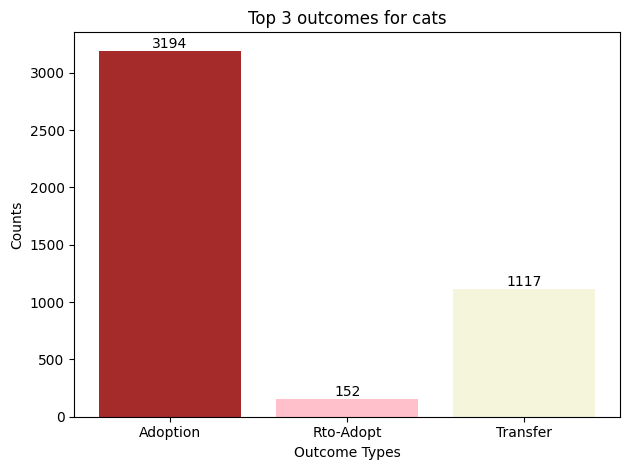

In [38]:
desired_outcomes = ['Adoption', 'Rto-Adopt', 'Transfer']
outcome_counts = {'Adoption': 3194, 'Rto-Adopt': 152, 'Transfer': 1117}


outcome_colors = {'Adoption': 'brown', 'Rto-Adopt': 'pink', 'Transfer': 'beige'}


outcome_types = list(outcome_counts.keys())
counts = list(outcome_counts.values())


plt.bar(outcome_types, counts, color=[outcome_colors[outcome] for outcome in outcome_types])


plt.xlabel('Outcome Types')
plt.ylabel('Counts')
plt.title('Top 3 outcomes for cats')

for index, value in enumerate(outcome_counts.values()):  
    plt.text(index, value, str(value), ha='center', va='bottom')



plt.tight_layout()
plt.show()


In [23]:
# Create separate dataframe for dog outcomes
Dog = ["Dog"] 
dog_outcomes_df = index_reset_df[index_reset_df["Animal Type"].isin(Dog)]
dog_outcomes_df.head(5)

,Animal ID,Month,Year,Outcome Type,Animal Type,Breed
1,A595061,Aug,2022,Return to Owner,Dog,Labrador Retriever Mix
4,A856853,May,2022,Adoption,Dog,Black Mouth Cur Mix
6,A851472,Feb,2022,Transfer,Dog,Cairn Terrier Mix
7,A870443,Dec,2022,Adoption,Dog,Jack Russell Terrier/Chihuahua Shorthair
8,A851434,Feb,2022,Transfer,Dog,Chihuahua Shorthair


In [24]:
# Data check: display monthly dog totals
dog_outcomes_df["Month"].value_counts()

Month
Aug    641
Apr    603
Jan    600
Jul    583
Sep    562
Jun    551
Mar    539
Feb    536
May    519
Oct    441
Dec    435
Nov    402
Name: count, dtype: int64

In [25]:
# Data check: display dog outcome types
dog_outcomes_df["Outcome Type"].value_counts()

Outcome Type
Adoption           3410
Transfer           1782
Return to Owner     951
Rto-Adopt           123
Euthanasia           97
Died                 34
Disposal             13
Stolen                2
Name: count, dtype: int64

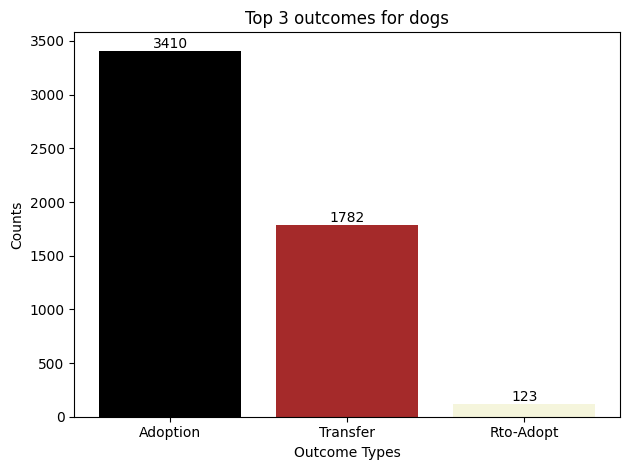

In [37]:
import matplotlib.pyplot as plt


desired_outcomes = ['Adoption', 'Rto-Adopt', 'Transfer']


filtered_df = dog_outcomes_df[dog_outcomes_df['Outcome Type'].isin(desired_outcomes)]


outcome_counts = filtered_df['Outcome Type'].value_counts()


outcome_colors = {'Adoption': 'black', 'Rto-Adopt': 'beige', 'Transfer': 'brown'}


plt.bar(outcome_counts.index, outcome_counts.values, color=[outcome_colors.get(outcome, 'gray') for outcome in outcome_counts.index])

plt.xlabel('Outcome Types')
plt.ylabel('Counts')
plt.title('Top 3 outcomes for dogs')

for index, value in enumerate(outcome_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')



plt.tight_layout()
plt.show()
